In [215]:
import numpy as np
import sklearn
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# Import and store the data in a data frame

In [216]:
columns = ["City1", "City2", "Average Fare", "Distance", "Average weekly passengers", "market leading airline", "market share", "Average fare", "Low price airline", "market share", "price"]
data = pd.read_csv('http://www.stat.ufl.edu/~winner/data/airq402.dat', sep='\s+', names=columns, skipinitialspace=True)

/home/sahil/Desktop/anaconda3/lib/python3.7/site-packages/pandas/io/parsers.py:702: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


In [217]:
data.head()

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share,Average fare,Low price airline,market share.1,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


# Remove the outliers from the data

In [218]:
le = preprocessing.LabelEncoder()

In [219]:
data.City1 = le.fit_transform(data.City1)
data.City2 = le.fit_transform(data.City2)
data['Low price airline'] = le.fit_transform(data['Low price airline'])
data['market leading airline'] = le.fit_transform(data['market leading airline'])

In [220]:
data.head()

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share,Average fare,Low price airline,market share.1,price
0,16,0,114.47,528,424.56,6,70.19,111.03,8,70.19,111.03
1,16,40,122.47,860,276.84,6,75.10,123.09,6,17.23,118.94
2,2,0,214.42,852,215.76,4,78.89,223.98,5,2.77,167.12
3,2,7,69.40,288,606.84,14,96.97,68.86,17,96.97,68.86
4,2,52,158.13,723,313.04,12,39.79,161.36,17,15.34,145.42


In [221]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
City1,1000.0,35.66600,23.275270,0.00,14.0000,31.000,55.2500,89.00
City2,1000.0,50.20100,22.355634,0.00,33.0000,52.500,72.0000,84.00
Average Fare,1000.0,163.37542,55.365470,50.52,125.9750,161.345,197.3925,401.23
Distance,1000.0,1056.97300,643.203251,108.00,553.5000,919.000,1452.5000,2724.00
Average weekly passengers,1000.0,672.27914,766.519254,181.41,257.1975,404.780,769.9125,8950.76
market leading airline,1000.0,8.14700,5.363222,0.00,3.7500,10.000,14.0000,15.00
market share,1000.0,60.12859,19.367779,17.68,46.5100,59.240,73.5100,100.00
Average fare,1000.0,166.64756,62.660140,50.52,124.0850,161.400,202.9775,490.03
Low price airline,1000.0,10.07900,6.065274,0.00,6.0000,10.000,16.0000,18.00
market share.1,1000.0,34.55148,27.096999,1.06,13.1950,26.140,52.9725,100.00


In [222]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1

In [223]:
print(iqr)

City1                         41.2500
City2                         39.0000
Average Fare                  71.4175
Distance                     899.0000
Average weekly passengers    512.7150
market leading airline        10.2500
market share                  27.0000
Average fare                  78.8925
Low price airline             10.0000
market share.1                39.7775
price                         54.7625
dtype: float64


In [224]:
data_out = data[~((data < (q1 - 1.5 * iqr)) | (data > (q3 + 1.5 * iqr))).any(axis=1)]

In [225]:
data_out.shape #we got 115 outliers

(885, 11)

# Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable

In [226]:
X = data_out.drop(columns=['Average Fare'], axis=1)
Y = data_out[['Average Fare']]

In [227]:
print(Y.shape)
print(X.shape)

(885, 1)
(885, 10)


# Drop the independent variables which has less than 0.1 correlation with the dependent variable

In [228]:
corr_matrix = data_out.corr().abs()
target = corr_matrix['Average Fare']
not_relevant_features = target[target < 0.1]
not_relevant_features

City1    0.092398
City2    0.029294
Name: Average Fare, dtype: float64

In [229]:
X.drop(columns=not_relevant_features.index, axis=1, inplace=True)

# Create scatter Plot of Independent Variable vs Dependent Variable.

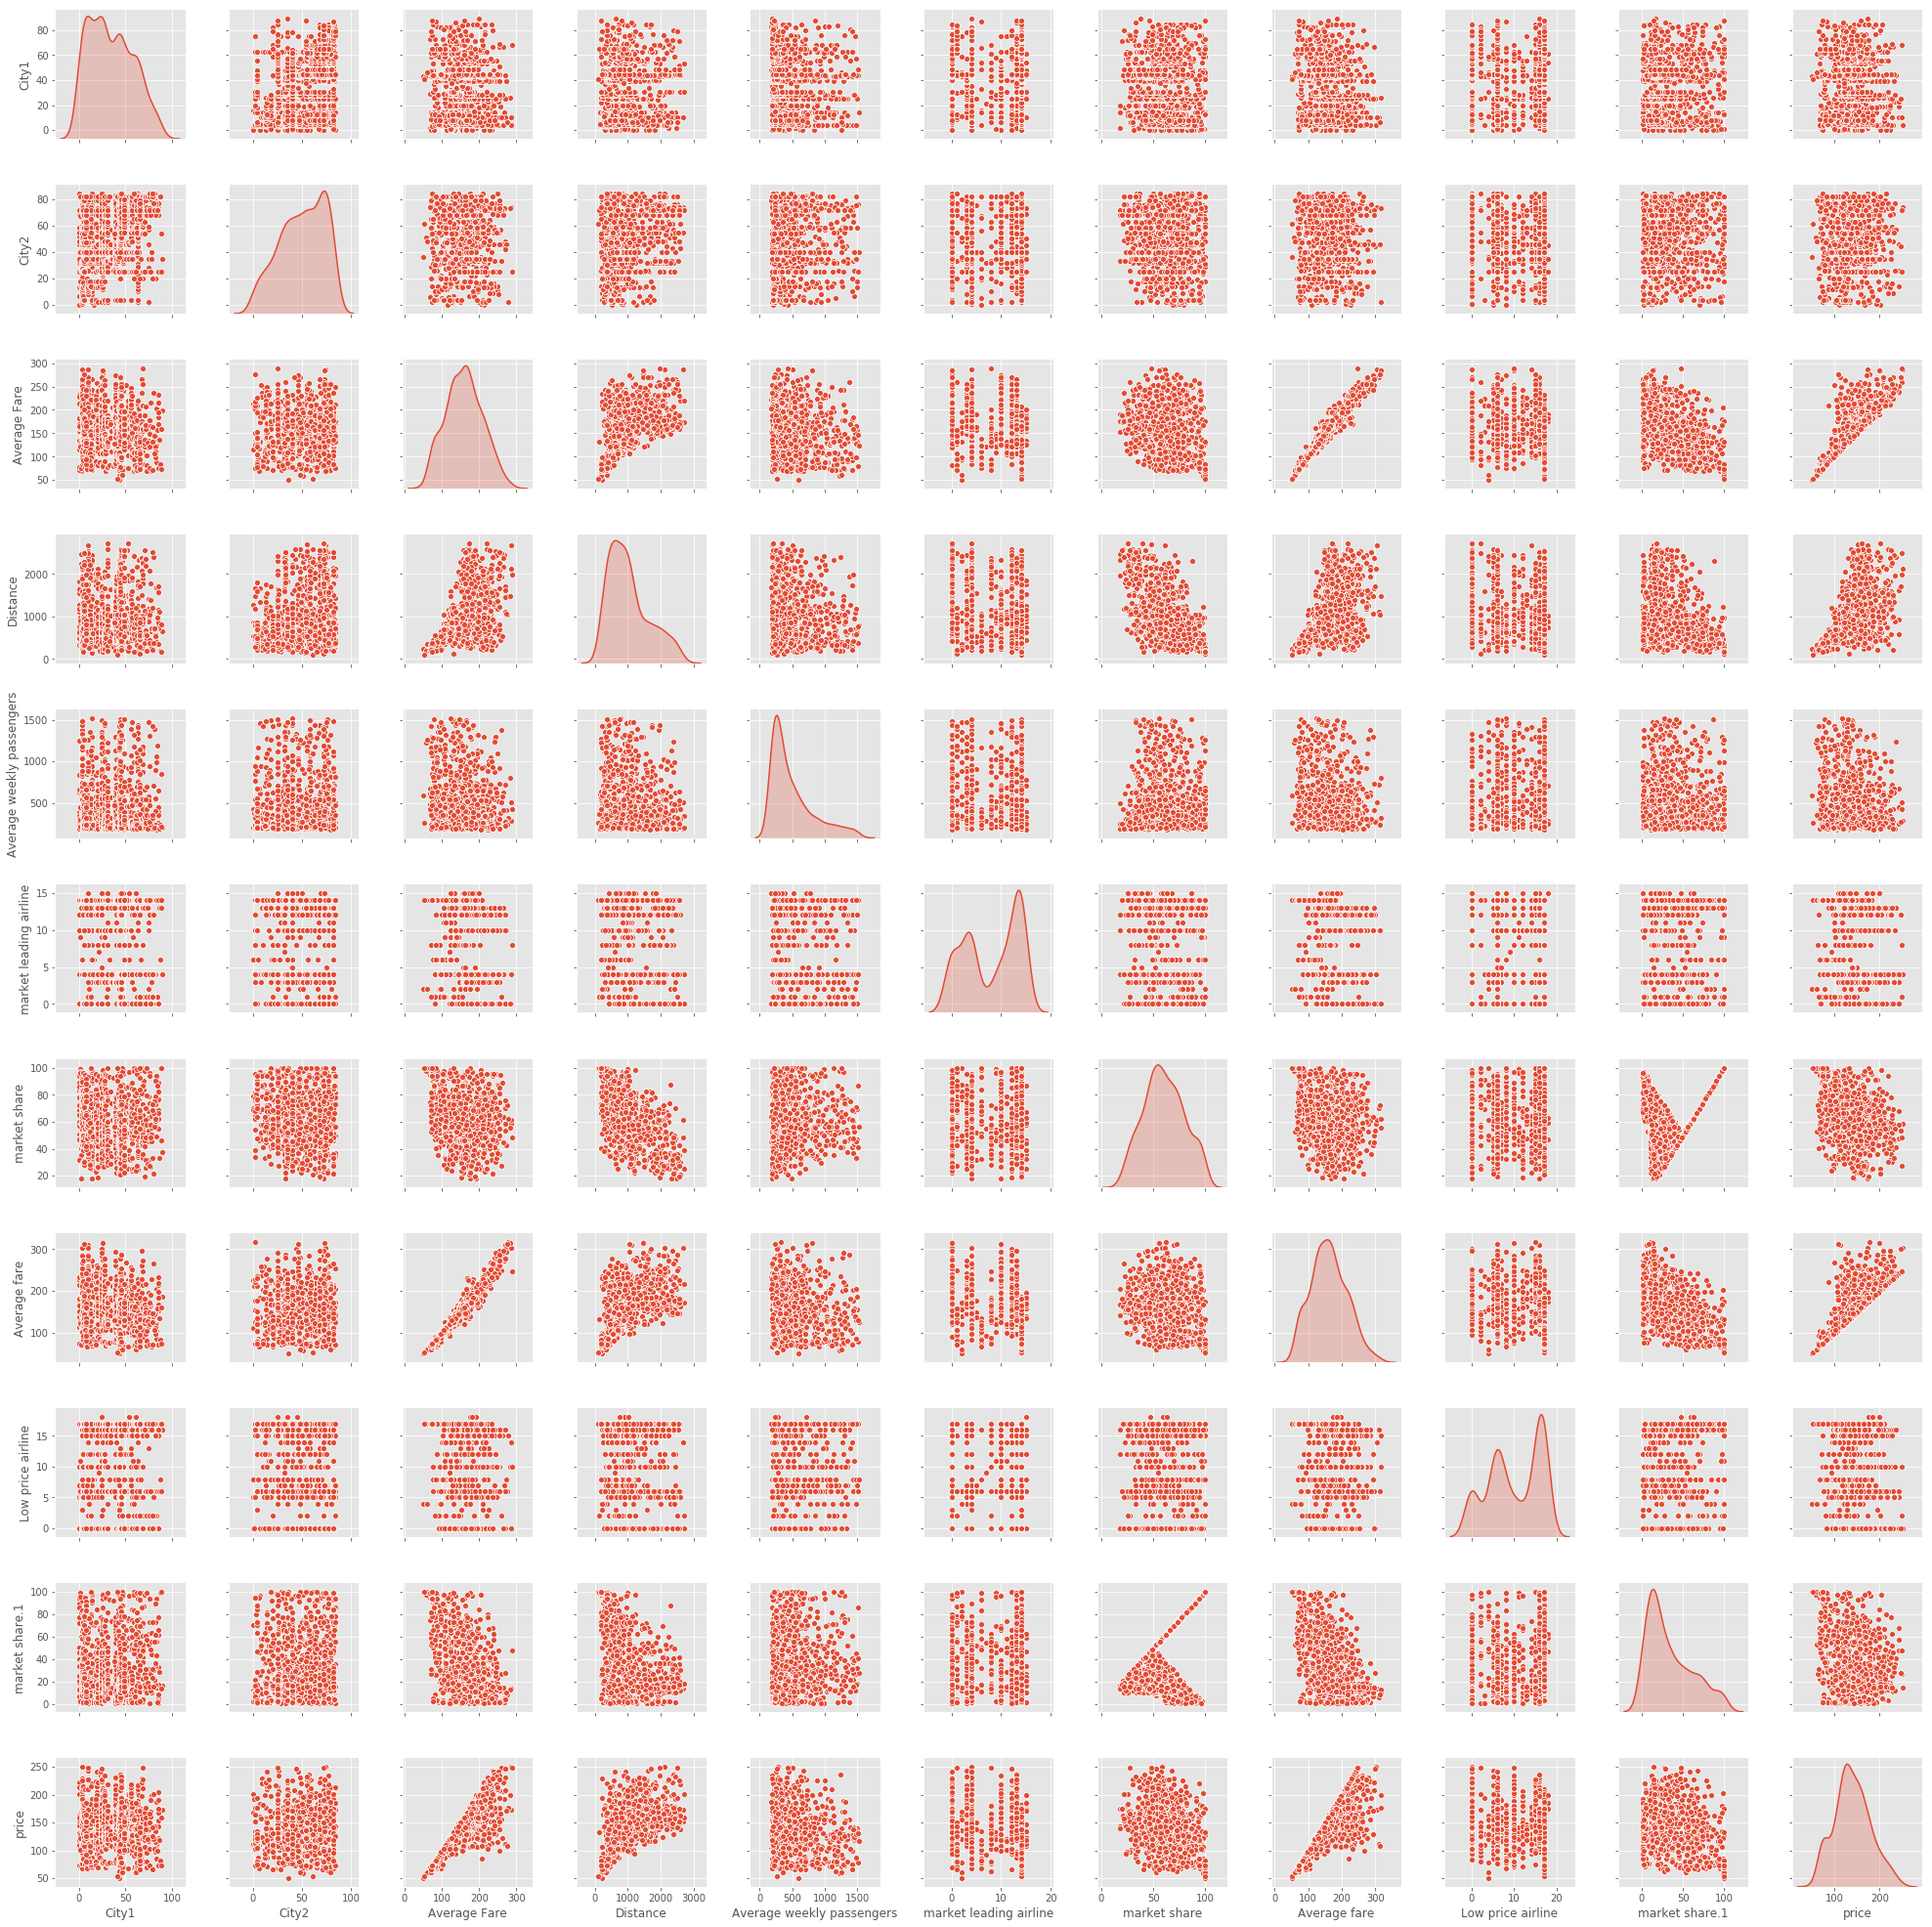

In [230]:
import seaborn as sns
sns.pairplot(data_out, diag_kind='kde')

# Divide the data set into training and test data set and build a Multiple Linear Regression model.

In [231]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

In [233]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Print the coefficients & intercepts of the linear regression model

In [234]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Distance is 0.0030852139200374367
The coefficient for Average weekly passengers is -0.003972195123647731
The coefficient for market leading airline is -0.2209874177793391
The coefficient for market share is 0.08853304219091981
The coefficient for Average fare is 0.7261867626088666
The coefficient for Low price airline is 0.047293615308426296
The coefficient for market share.1 is -0.031557389516291084
The coefficient for price is 0.2264417002069785


In [235]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 5.9596622564700965


# Print the accuracy of the overall model

In [236]:
regression_model.score(X_test, y_test)

0.973971084867296